In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from importlib import reload
import depthutil as dpu

In [45]:
reload(dpu)

<module 'depthutil' from '/Users/gliao/Documents/marketdepthstudy/depthutil.py'>

In [3]:
filein='data/mintburn_usdceth3000_simple.csv'
fileprice='data/ethprice.csv'
tickwindow=60
depthpct=0.02

#load data and format
dfprice=pd.read_csv(fileprice).rename(columns={'price':'P'})
dfprice['date']=pd.to_datetime(dfprice.date).dt.date
df=pd.read_csv(filein)
# df=pd.read_csv('data/mintburn_usdceth500.csv')
df['amount']=df.amount.map(float)
df=df.rename(columns={'lowertick':'tickLower','uppertick':'tickUpper'})
df['date']=pd.to_datetime(df.call_block_time).dt.date

dfs=df.groupby(['date','tickLower','tickUpper']).amount.sum()
dft2=pd.DataFrame(dfs).reset_index()

rgn=dpu.genLiqRange(dft2,tickwindow=tickwindow)

In [137]:
reload(dpu)

<module 'depthutil' from '/Users/gliao/Documents/marketdepthstudy/depthutil.py'>

In [138]:
rgn['P']=dfprice.loc[dfprice.date==dft2.date.max(),'P'].values[0]

In [139]:
liq=dpu.calcdollarliq(rgn,tickwindow=tickwindow,alt=0).pipe(dpu.calcDepth)
liq2=dpu.calcdollarliq(rgn,tickwindow=tickwindow,alt=1).pipe(dpu.calcDepth)


<AxesSubplot:xlabel='price'>

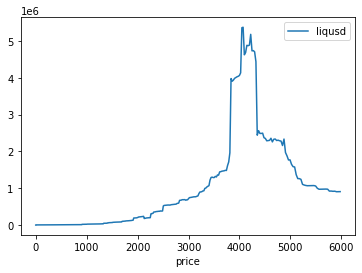

In [140]:
liq.query('price<6000').plot('price','liqusd')

<AxesSubplot:xlabel='price'>

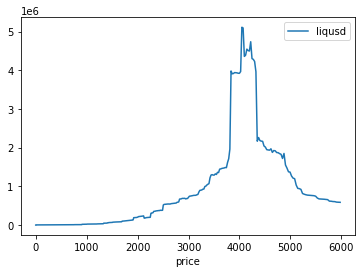

In [141]:
liq2.query('price<6000').plot('price','liqusd')

<AxesSubplot:xlabel='price'>

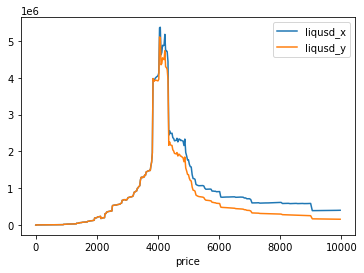

In [142]:
pd.merge(liq,liq2,on='price').query('price<10000').set_index('price')[['liqusd_x','liqusd_y']].plot()

In [109]:
liq.head(2)

,tickLower,amount,price,P,pa,pb,p,x,y,liqusd,depth
29574,887220,0.000000e+00,2.954278e-27,3857.78,3.384921e+38,3.405291e+38,2.592164e+08,0.000000e+00,0.0,0.000000e+00,8.699824e+07
29573,887160,2.464244e+15,2.972056e-27,3857.78,3.364674e+38,3.384921e+38,2.592164e+08,4.024024e-13,0.0,4.024024e-13,8.699824e+07


<AxesSubplot:xlabel='price'>

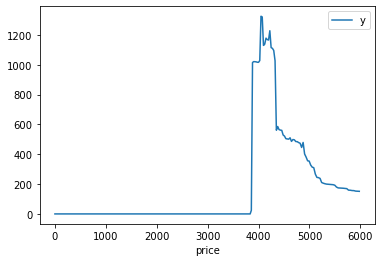

In [128]:
liq.query('price<6000').plot('price','y')

In [143]:
liq.query('price<1e7').liqusd.sum()/1e6

348.0148912948336

In [144]:
liq2.query('price<1e7').liqusd.sum()/1e6

270.91854631007527

In [145]:
liq.liqusd.sum()/1e6

4.777800531749009e+22

In [146]:
liq2.liqusd.sum()/1e6

270.92354039720374

In [147]:
dpu.expandliqdistrib(liq)

(23575914.681065805, 10437978.558263822, 13137936.12280199)

In [148]:
dpu.expandliqdistrib(liq2)

(23404414.20528543, 10437965.52061992, 12966448.684665509)